(C) 2025, Gerold Baier, University College London

# Complex Oscillations

Oscillators that interact can produce oscillations that are more complex. To interact, oscillators need to be connected with at least one coupling term. Here we study the symmetric interaction between two oscillators as a principal case of self-organised complex oscillations that are found in nonlinear dynamical systems. 

## Two Coupled Oscillators with Excitatory Coupling

If we couple two oscillators, we obtain a system of four interacting differential equations: two variables for the first and two for the second oscillator. 

The equations:

$$\frac{dEx_1}{dt} = (h_{ex1} - Ex_1 + c_1*tanh(Ex_1) - c_2*tanh(In_1) + coup*Ex_2)*\tau_{ex}$$

$$\frac{dIn_1}{dt} = (h_{in1} - In_1 + c_3*tanh(Ex_1) - c_4*tanh(In_1))*\tau_{in} $$

$$\frac{dEx_2}{dt} = (h_{ex2} - Ex_2 + c_1*tanh(Ex_2) - c_2*tanh(In_2) + coup*Ex_1)*\tau_{ex}$$

$$\frac{dIn_2}{dt} = (h_{in2} - In_2 + c_3*tanh(Ex_2) - c_4*tanh(In_2))*\tau_{in} $$


where $Ex_1$, $Ex_2$, $In_1$ and $In_2$ are the variables.

$h_{ex1}$, $h_{ex2}$, $h_{in1}$, $h_{in2}$, $c_1$, $c_2$, $c_3$, and $c_4$ are model parameters. 

_tanh_ is the tangens hyperbolicus. 

$\tau_{ex}$, and $\tau_{in}$ are the time contants (assumed here to be identical for each oscillator).

$coup$ is the coupling parameter. For $coup=0$, there is no coupling and the dynamics is identical to the uncoupled oscillator.

To analyse, we assume that the two oscillators represent different spatial locations. The interaction is based on neurophysiological evidence. For interpretation look out for waveform, frequency composition, temporal and spatial asymmetry (symmetry breaking).



## Import Functions

In [20]:
from scipy.integrate import odeint
from scipy.signal import find_peaks

from numpy import zeros, ones, tanh, mod, gradient, linspace, fill_diagonal, ndarray, amax, amin, where
from numpy import asarray, array, around, arange, corrcoef, flip, var
from numpy.random import default_rng

from matplotlib.pyplot import subplots


## Model and Functions

In [23]:
def sigmoid(u):
    return tanh(u)

def N_oscillators(y, t, N, h_ex_rand, h_in_rand, coupling_matrix_E, pars):

    tau_ex, tau_in, c1, c2, c3, c4 = pars

    # Separate Variables
    y_ex = y[:-1:2]
    y_in = y[1::2]

    dy_ex, dy_in = zeros(N), zeros(N)
    dydt = zeros(2*N)

    for osc in arange(N):
        
        coup_E = sum(coupling_matrix_E[:, osc] * y_ex)

        dy_ex[osc] = (h_ex_rand[osc] - y_ex[osc] + c1*sigmoid(y_ex[osc]) - c2*sigmoid(y_in[osc]) + coup_E)*tau_ex 
        dy_in[osc] = (h_in_rand[osc] - y_in[osc] + c3*sigmoid(y_ex[osc]) - c4*sigmoid(y_in[osc])         )*tau_in

# Combine Variables

    dydt[:-1:2] = dy_ex
    dydt[1: :2] = dy_in

    return dydt



In [25]:
def plot_series(time, data, time_begin, time_end, sr):
    
    N = data.shape[1]//2
    
    name_vars = ('Ex_', 'In_')

    no_vars = len(name_vars)

    if N == 1:

        fig, ax = subplots(ncols=len(name_vars), figsize=(8, 6))

        for ind in arange(no_vars):

            ax[ind].plot(time[time_begin*sr:time_end*sr], data[time_begin*sr:time_end*sr, ind], linewidth=2, c='b')
            ax[ind].set_xticks(linspace(0, (time_end-time_begin)*sr, 5));
            ax[ind].set_xticklabels([]);
            ax[ind].set_xlabel('Time', fontsize=14);
            ax[ind].set_ylabel(name_vars[ind], fontsize=14)
            y_min, y_max = ax[ind].get_ylim()
            ax[ind].set_yticks(linspace(y_min, y_max, 3));
            ax[ind].set_yticklabels(around(linspace(y_min, y_max, 3),1), fontsize=14);

    else:

        y_max1 = amax(data[:, arange(0, 2*N, 2)])

        if y_max1 > 0:

            y_max1_ax = 1.1*y_max1

        else:

            y_max1_ax = 0.9*y_max1


        y_min1 = amin(data[:, arange(0, 2*N, 2)])

        if y_min1 > 0:

            y_min1_ax = 0.9*y_min1

        else:

            y_min1_ax = 1.1*y_min1


        y_max2 = amax(data[:, arange(1, 2*N+1, 2)])

        if y_max2 > 0:

            y_max2_ax = 1.1*y_max2

        else:

            y_max2_ax = 0.9*y_max2   


        y_min2 = amin(data[:, arange(1, 2*N+1, 2)])

        if y_min2 > 0:

            y_min2_ax = 0.9*y_min2

        else:

            y_min2_ax = 1.1*y_min2


        fig, ax = subplots(ncols=len(name_vars), nrows=N, figsize=(10, 6))

        for osc in arange(N):
            for ind in arange(2):

                if ind == 0:
                    ax[osc, ind].plot(time[time_begin*sr:time_end*sr], data[time_begin*sr:time_end*sr, 2*osc+ind], linewidth=1, c='b')
                    ax[osc, ind].set_xticklabels([]);
                    ax[osc, ind].set_ylim(y_min1_ax, y_max1_ax)   
                    ax[osc, ind].set_yticks(linspace(y_min1_ax, y_max1_ax, 3));
                    ax[osc, ind].set_yticklabels(around(linspace(y_min1_ax, y_max1_ax, 3),1), fontsize=14);

                elif ind == 1:
                    ax[osc, ind].plot(time[time_begin*sr:time_end*sr], data[time_begin*sr:time_end*sr, 2*osc+ind], linewidth=1, c='r')
                    ax[osc, ind].set_xticklabels([]);
                    ax[osc, ind].set_ylim(y_min2_ax, y_max2_ax)
                    ax[osc, ind].set_yticks(linspace(y_min2_ax, y_max2_ax, 3));
                    ax[osc, ind].set_yticklabels(around(linspace(y_min2_ax, y_max2_ax, 3),1), fontsize=14);

                if osc == N-1:

                    ax[N-1, ind].set_xlabel('Time', fontsize=14);
                    # print(time[time_begin*sr:time_end*sr].size)
                    # print((time_end-time_begin)*sr)
                    ax[N-1, ind].set_xticks(linspace(time_begin, time_end, 5));
                    ax[N-1, ind].set_xticklabels(linspace(time_begin, time_end, 5));

                label_text = name_vars[ind] + str(osc+1)

                ax[osc, ind].set_ylabel(label_text, fontsize=14)

    fig.tight_layout()
    
    return fig, ax


In [27]:
def plot_bifdiagram(results_min_f, results_max_f, 
                    results_min_b, results_max_b,
                    par_set):
    
    N = len(results_min_f)

    fig, ax = subplots(ncols=1, nrows=N, figsize=(5, 4))

    for osc in arange(N):

        # Forward
        for xe, ye in zip(par_set, results_max_f[osc]):

            if not isinstance(ye, ndarray):
                ax[osc].scatter(xe, ye, c='k', s=2)
            else:
                ax[osc].scatter([xe] * len(ye), ye, s=2, marker='X', facecolors='r')

        for xe, ye in zip(par_set, results_min_f[osc]):

            if not isinstance(ye, ndarray):
                ax[osc].scatter(xe, ye, c='k', s=2)
            else:
                ax[osc].scatter([xe] * len(ye), ye, s=2, marker='X', facecolors='m')

        ax[osc].set_xticks(linspace(par_min, par_max, 6))
        ax[osc].set_xticklabels([])

        y_min, y_max = ax[osc].get_ylim()

        ax[osc].set_yticks(linspace(y_min, y_max, 3));
        ax[osc].set_yticklabels(around(linspace(y_min, y_max, 3),1), fontsize=12);

        label_text = 'Osc ' + str(osc+1)
        ax[osc].set_ylabel(label_text, fontsize=14)

    ax[osc].set_xticks(linspace(par_min, par_max, 6));
    ax[osc].set_xticklabels(around(linspace(par_min, par_max, 6), 3), fontsize=12);
                           
    if par_set[-1] < par_set[0]:
                           
        chars = 'Right'
                           
    else:
                  
        chars = 'Left'

    title_chars = 'Starts from: ' + chars
    fig.suptitle(title_chars, fontsize=14)

    fig.tight_layout()
    
    return fig, ax


## Time Series


In [30]:
# Number of oscillators
N = 2

# Excitatory input parameter
h_ex_0 = -2 # -3.3
h_in_0 = -4

eps    = 0.0001
SEED   = 1234

rng = default_rng(SEED)

h_ex_rand = h_ex_0 + eps*rng.normal(0,1,size=N)
h_in_rand = h_in_0 + eps*rng.normal(0,1,size=N)

pars = (1, 1, 4, 6, 6, 0)

# Coupling matrices
coupling_matrix_E_ini = ones(shape=(N, N))

fill_diagonal(coupling_matrix_E_ini, 0)

coupling_strength_E = 0.1

coupling_matrix_E = coupling_strength_E * coupling_matrix_E_ini

# Initial conditions
SEED = 12

y_ini = rng.uniform(size=2*N)
# y_ini = y[-1, :]


# Time array
time_stop = 500
sr        = 1000
time      = linspace(start=0, stop=time_stop, num=time_stop*sr)

# Simulation
y= odeint(func=N_oscillators, y0=y_ini, t=time, 
          args=(N, h_ex_rand, h_in_rand, coupling_matrix_E, pars), 
          hmax=0.1)


# Show final values of all variables
print('End of run:', list(around(y[-1,:],3)))
print('')


End of run: [np.float64(0.417), np.float64(-0.641), np.float64(1.236), np.float64(0.493)]



figs/SuperHopf_Timeseries_coup_E_0.1_h_ex-2.png


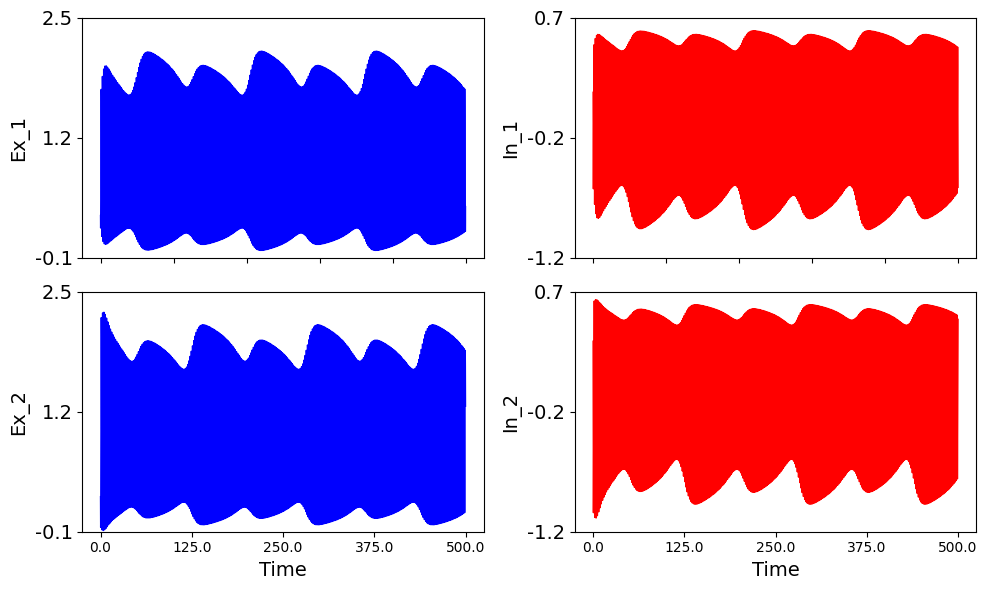

In [32]:
time_begin, time_end = 0, time_stop

fig, ax = plot_series(time, y, time_begin, time_end, sr)

title_chars = 'figs/SuperHopf_Timeseries_coup_E_' + str(coupling_strength_E) + '_h_ex' + str(h_ex_0) + '.png'
# fig.savefig(title_chars, format='png')
print(title_chars)


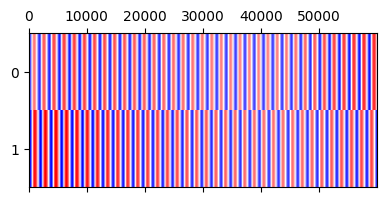

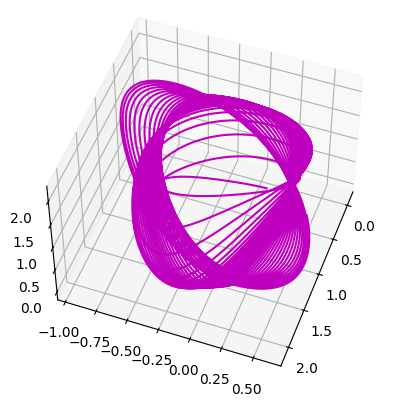

In [35]:
fig, ax = subplots(figsize=(4.5,2))

stop = 60000

ax.matshow(y[:stop, ::2].T, aspect='auto', cmap='bwr');

show()


fig, ax = subplots(figsize=(6, 4))

ax.set_visible(False)

ax = axes(projection='3d')

ax.plot3D(y[:stop, 0], y[:stop, 1], y[:stop, 2], color='m');

ax.view_init(50, 20);

fig.tight_layout()


## Calculate Correlation


In [37]:
data_corr = corrcoef(y[:stop, 0], y[:stop, 2], rowvar='False')

data_corr[0, 1]

np.float64(-0.30766755118667144)

## Bifurcation Diagram

In [40]:
# Initial conditions
# y_ini = uniform(size=2*N)
y_ini = y[-1, :]

run_correlation = 'yes' # 'yes' or 'no'

# Bifurcation parameter range
steps = 30

par_min, par_max = 0.20, 0.1

par_set = linspace(par_min, par_max, steps)

# Stop time
time_stop = 500
time = linspace(start=0, stop=time_stop, num=time_stop*sr)

results_max_f      = dict()
results_max_inds_f = dict()
results_min_f      = dict()
results_min_inds_f = dict()

rows = time.size

data_corrs = list()

# Simulation "forward"
for par in par_set:
        
    coupling_matrix_E_par = par * coupling_matrix_E_ini


    y_f = odeint(func=N_oscillators, y0=y_ini, t=time, 
             args=(N, h_ex_rand, h_in_rand, coupling_matrix_E_par, pars), 
             hmax=0.1)

    for num, series in enumerate(y_f[rows//2:,:-1:2].T):
                
        if var(series) < 0.00005:
            
            if num not in results_max_f:
                
                results_max_f[num]      = [series[-1]]
                results_max_inds_f[num] = [0]    
                results_min_f[num]      = [series[-1]]
                results_min_inds_f[num] = [0]    
                
            else:
                results_max_f[num].append(series[-1])
                results_max_inds_f[num].append(0)    
                results_min_f[num].append(series[-1])
                results_min_inds_f[num].append(0)               


        else:
            y_f_max_inds = find_peaks(series, distance=100)
            y_f_maxs     = series[y_f_max_inds[0]]

            y_f_min_inds = find_peaks(-series, distance=100)
            y_f_mins     = series[y_f_min_inds[0]]

            if num not in results_max_f:

                results_max_f[num]      = [y_f_maxs]
                results_max_inds_f[num] = [y_f_max_inds]
                results_min_f[num]      = [y_f_mins]    
                results_min_inds_f[num] = [y_f_min_inds]    

            else:

                results_max_f[num].append(y_f_maxs)
                results_max_inds_f[num].append(y_f_max_inds)
                results_min_f[num].append(y_f_mins)
                results_min_inds_f[num].append(y_f_min_inds)

    if run_correlation == 'yes':
        
        data_corr = corrcoef(y_f[rows//2:, 0], y_f[rows//2:, 2], rowvar='False')

        data_corrs.append(data_corr[0, 1])
        
    
    if par != par_set[-1]:
        
        y_ini = y_f[-1, :]


results_max_b      = dict()
results_max_inds_b = dict()
results_min_b      = dict()
results_min_inds_b = dict()

# Simulation "backward"
for par in flip(par_set):

    coupling_matrix_E_par = par * coupling_matrix_E_ini

    y_b = odeint(func=N_oscillators, y0=y_ini, t=time, 
         args=(N, h_ex_rand, h_in_rand, coupling_matrix_E_par, pars), 
         hmax=0.1)


    for num, series in enumerate(y_b[rows//2:,:-1:2].T):
        
        if var(series) < 0.00005:
            
            if num not in results_max_b:
                
                results_max_b[num]      = [series[-1]]
                results_max_inds_b[num] = [0]    
                results_min_b[num]      = [series[-1]]
                results_min_inds_b[num] = [0]    
                
            else:
                results_max_b[num].append(series[-1])
                results_max_inds_b[num].append(0)    
                results_min_b[num].append(series[-1])
                results_min_inds_b[num].append(0)               


        else:
            y_b_max_inds = find_peaks(series, distance=100)
            y_b_maxs     = series[y_b_max_inds[0]]

            y_b_min_inds = find_peaks(-series, distance=100)
            y_b_mins     = series[y_b_min_inds[0]]

            if num not in results_max_b:

                results_max_b[num]      = [y_b_maxs]
                results_max_inds_b[num] = [y_b_max_inds]
                results_min_b[num]      = [y_b_mins]    
                results_min_inds_b[num] = [y_b_min_inds]    

            else:

                results_max_b[num].append(y_b_maxs)
                results_max_inds_b[num].append(y_b_max_inds)
                results_min_b[num].append(y_b_mins)
                results_min_inds_b[num].append(y_b_min_inds)

    y_ini = y_b[-1, :]

print('')
print('Complete!', list(around(y_b[-1,:],3)))
print('')



Complete! [np.float64(0.002), np.float64(0.345), np.float64(-0.005), np.float64(0.338)]



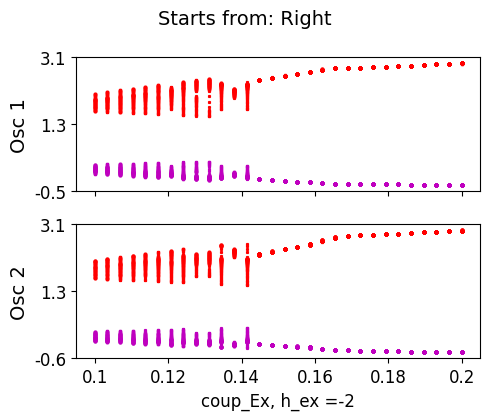

In [42]:
# Bifurcation Plot
fig, ax = plot_bifdiagram(results_min_f, results_max_f, 
                          results_min_b, results_max_b, par_set)

if par_max < par_min:
    
    direct = '_back.png'
    
else:
    
    direct = '_forw.png'

ax[N-1].set_xlabel('coup_Ex, h_ex =' + str(h_ex_0), fontsize=12)
    
show()


title_chars = 'figs/SuperHopf_Bifs_coup_Ex' + '_h_ex=' + str(h_ex_0) + direct
# fig.savefig(title_chars, format='png')
title_chars


## Correlation as a Function of Coupling

'figs/SuperHopf_Corrs_coup_Ex__h_ex-2_back.png'

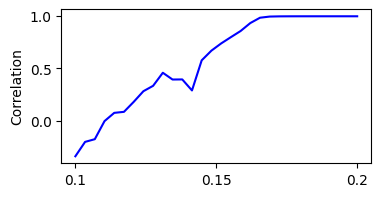

In [45]:
fig, ax = subplots(figsize=(4, 2))

ax.plot(flip(par_set), flip(data_corrs), color='b');
ax.set_xticks(linspace(par_max, par_min, 3))
ax.set_xticklabels(around(linspace(par_max, par_min, 3), 2));
ax.set_ylabel('Correlation')


title_chars = 'figs/SuperHopf_Corrs_coup_Ex_' + '_h_ex' + str(h_ex_0) + direct
# fig.savefig(title_chars, format='png')
title_chars


The correlation between corresponding variables in the two oscillators is not always a simple (e.g. continuously growing) function of the coupling constant.

# Notes on the Reading

## Coupled oscillators approach in analysis of bivariate data, M Rosenblum et al.

This paper discribes the behaviour of nonlinear coupled oscillators. It derives the phase relationships as they vary with increasing coupling strength. The proposed method to quantify phase relationships is applicable to experimental data. It is argued, that in reverse, experimentally obtained values of phase relationships allow some conclusion about the strength of the coupling between interacting oscillators. 
